In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("synthetic_ecommerce_churn_dataset.csv")

In [ ]:

df.tail()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
4995,CUST_8533,49,Female,UK,132.16,9,306,0,Electronics,20.9,2020-10-17,13,0.33
4996,CUST_5616,23,Female,UK,47.81,10,296,0,Home,NaN,2024-10-21,66,0.22
4997,CUST_2140,79,Male,Japan,224.97,16,84,0,Beauty,92.9,2022-11-13,56,0.23
4998,CUST_6730,62,Male,USA,220.33,8,254,0,Fashion,83.8,2023-05-29,47,0.09
4999,CUST_8465,38,Male,Canada,75.57,6,326,0,Home,4.1,2021-09-02,77,0.49


In [4]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   gender              5000 non-null   object 
 3   country             5000 non-null   object 
 4   avg_order_value     4750 non-null   float64
 5   total_orders        5000 non-null   int64  
 6   last_purchase       5000 non-null   int64  
 7   is_fraudulent       5000 non-null   int64  
 8   preferred_category  5000 non-null   object 
 9   email_open_rate     4750 non-null   float64
 10  customer_since      5000 non-null   object 
 11  loyalty_score       5000 non-null   int64  
 12  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


In [6]:
df.describe()

,age,avg_order_value,total_orders,last_purchase,is_fraudulent,email_open_rate,loyalty_score,churn_risk
count,5000.000000,4750.000000,5000.000000,5000.000000,5000.000000,4750.000000,5000.000000,5000.000000
mean,48.163200,108.442857,10.027000,180.073200,0.025800,50.714842,50.039400,0.284484
std,17.880797,69.265559,3.163838,104.926518,0.158554,29.098706,28.832151,0.159690
min,18.000000,10.660000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,33.000000,57.805000,8.000000,89.000000,0.000000,25.225000,25.000000,0.160000
50%,48.000000,93.190000,10.000000,178.000000,0.000000,50.950000,50.000000,0.260000
75%,64.000000,142.197500,12.000000,270.000000,0.000000,76.800000,75.000000,0.390000
max,79.000000,555.460000,23.000000,364.000000,1.000000,100.000000,99.000000,0.900000


In [7]:
df.isnull().sum()

customer_id             0
age                     0
gender                  0
country                 0
avg_order_value       250
total_orders            0
last_purchase           0
is_fraudulent           0
preferred_category      0
email_open_rate       250
customer_since          0
loyalty_score           0
churn_risk              0
dtype: int64

In [8]:
df.columns

Index(['customer_id', 'age', 'gender', 'country', 'avg_order_value',
       'total_orders', 'last_purchase', 'is_fraudulent', 'preferred_category',
       'email_open_rate', 'customer_since', 'loyalty_score', 'churn_risk'],
      dtype='object')

In [11]:
df['avg_order_value'].fillna(df['avg_order_value'].mean(), inplace=True)
df["email_open_rate"].fillna(df["email_open_rate"].mean(), inplace=True)

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_13988\4261914842.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_order_value'].fillna(df['avg_order_value'].mean(), inplace=True)
C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_13988\4261914842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

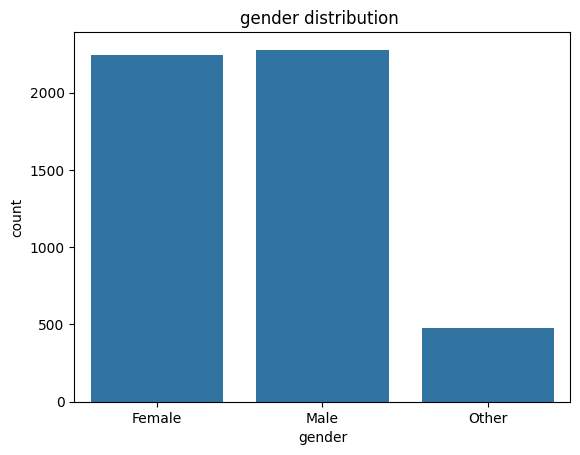

In [13]:
import seaborn as sns

sns.countplot(x="gender", data=df)
plt.title("gender distribution ")
plt.show()

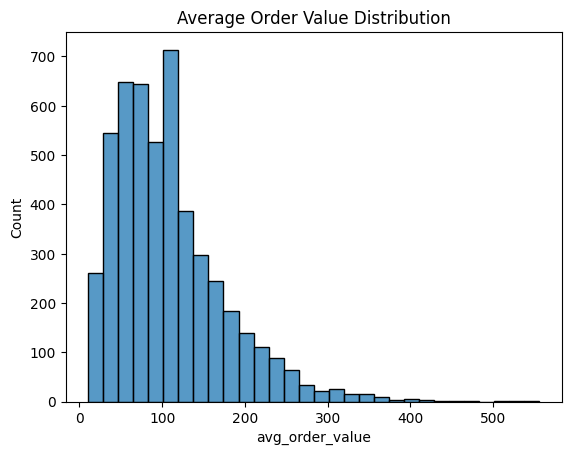

In [14]:
sns.histplot(df['avg_order_value'], bins=30)
plt.title("Average Order Value Distribution")   
plt.show()

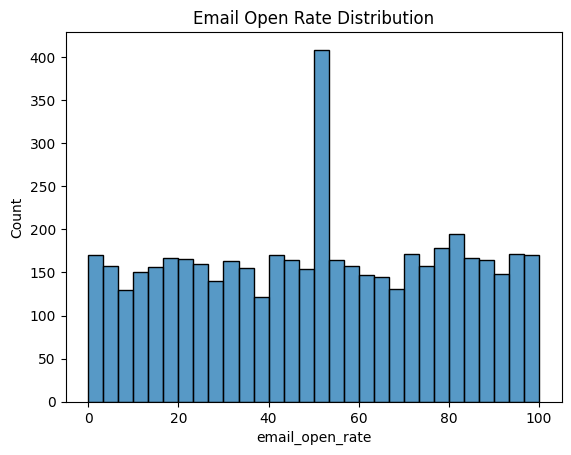

In [16]:
sns.histplot(df['email_open_rate'], bins=30)
plt.title("Email Open Rate Distribution")
plt.show()

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_13988\2466171373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


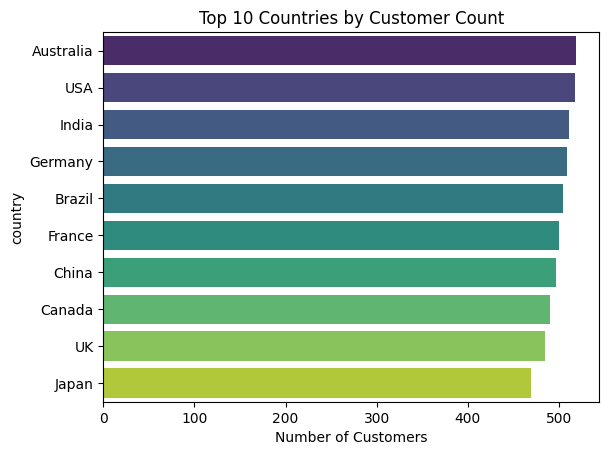

In [19]:
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Customer Count")
plt.xlabel("Number of Customers")
plt.show()

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_13988\322081671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_rate_by_country.index, y=fraud_rate_by_country.values, palette="viridis")


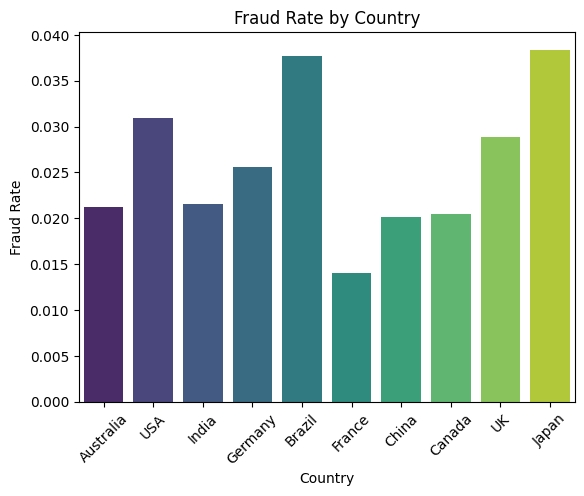

In [21]:
# Calculate fraud rate by country
fraud_rate_by_country = df.groupby('country')['is_fraudulent'].mean().loc[top_countries.index]

sns.barplot(x=fraud_rate_by_country.index, y=fraud_rate_by_country.values, palette="viridis")
plt.title("Fraud Rate by Country")
plt.xlabel("Country")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_13988\4179684918.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=non_fraud_rate_by_country.index, y=non_fraud_rate_by_country.values, palette="viridis")


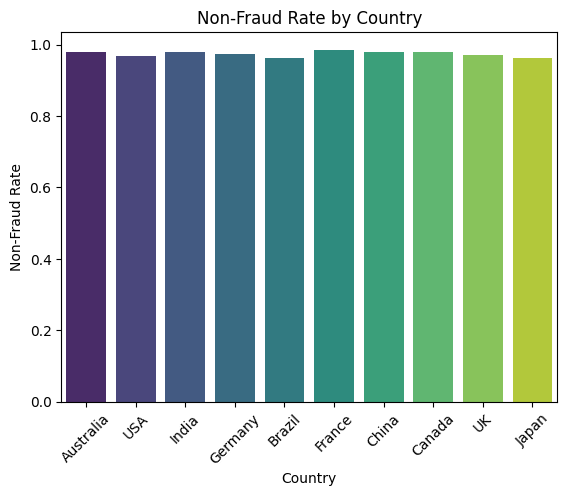

In [23]:
non_fraud_rate_by_country = 1 - fraud_rate_by_country

sns.barplot(x=non_fraud_rate_by_country.index, y=non_fraud_rate_by_country.values, palette="viridis")
plt.title("Non-Fraud Rate by Country")
plt.xlabel("Country")
plt.ylabel("Non-Fraud Rate")
plt.xticks(rotation=45)
plt.show()

C:\Users\Ammar Arain\AppData\Local\Temp\ipykernel_13988\4269983752.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='email_open_rate', palette='coolwarm')


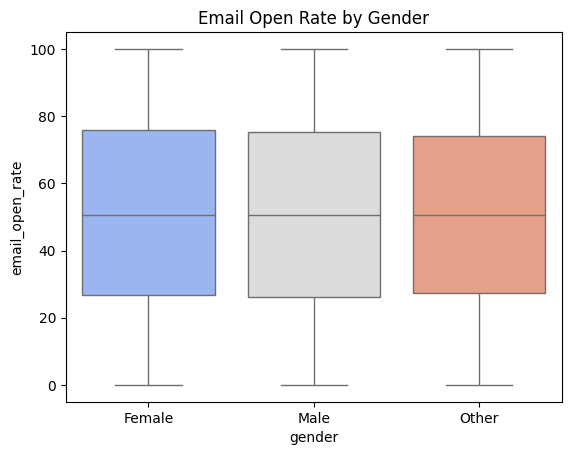

In [24]:
sns.boxplot(data=df, x='gender', y='email_open_rate', palette='coolwarm')
plt.title("Email Open Rate by Gender")
plt.show()

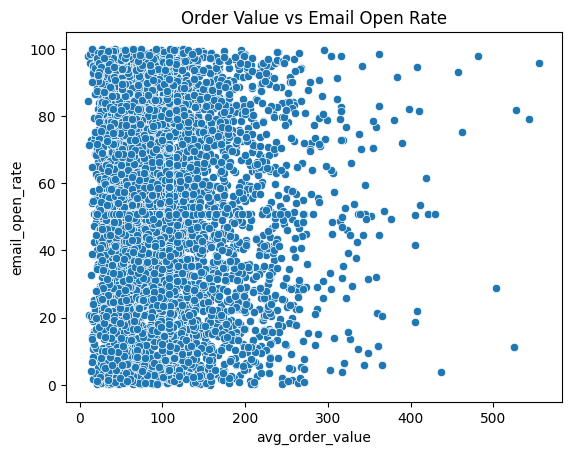

In [25]:
sns.scatterplot(x='avg_order_value', y='email_open_rate', data=df)
plt.title("Order Value vs Email Open Rate")
plt.show()

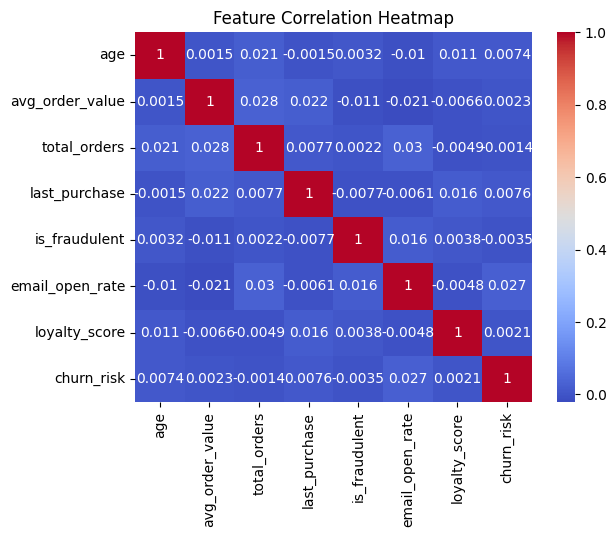

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [34]:
df_ml = pd.get_dummies(df, drop_first=True)



In [35]:
X = df_ml.drop('is_fraudulent', axis=1)
y = df_ml['is_fraudulent']


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [41]:
print("Logistic Regression Score (accuracy on test set):", model.score(X_test_scaled, y_test))

Logistic Regression Score (accuracy on test set): 0.966


In [40]:
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.966
